In [1]:
from util_plot import *
from util_feature import *  
from util_model import * 

# Counter() does not seem to work when imported
from collections import Counter

No module named 'cufflinks'
No module named 'pandas_profiling'
os.getcwd /home/maxime/Documents/da-dev/da


In [2]:
# This was added in util_features

from geopy.distance import great_circle

In [3]:
file_path = 'data/airbnb/'

In [4]:
# Unzip all the docs as csv obviously

neighbourhoods = file_path+'neighbourhoods.csv'
listings = file_path+'listings.csv'
listings_summary = file_path+'listings_summary.csv'
reviews = file_path+'reviews.csv'
reviews_summary = file_path+'reviews_summary.csv'

In [5]:
df_neighb = pd.read_csv(neighbourhoods)
df_list = pd.read_csv(listings)
df_list_sum = pd.read_csv(listings_summary)
df_rev = pd.read_csv(reviews)
df_rev_sum = pd.read_csv(reviews_summary)

list_dataframes = [df_neighb, df_list, df_list_sum, df_rev, df_rev_sum]

In [6]:
shape_type_df = pd_dflist_shape(list_dataframes)

shape of dataframe 1 is: (139, 2)
shape of dataframe 2 is: (22552, 16)
shape of dataframe 3 is: (453, 96)
shape of dataframe 4 is: (401963, 2)
shape of dataframe 5 is: (15695, 6)


In [7]:
df_neighb.head()

,neighbourhood_group,neighbourhood
0,Charlottenburg-Wilm.,Barstraße
1,Charlottenburg-Wilm.,Charlottenburg Nord
2,Charlottenburg-Wilm.,Düsseldorfer Straße
3,Charlottenburg-Wilm.,Forst Grunewald
4,Charlottenburg-Wilm.,Grunewald


In [8]:
df_list.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2015,Berlin-Mitte Value! Quiet courtyard/very central,2217,Ian,Mitte,Brunnenstr. Süd,52.534537,13.402557,Entire home/apt,60,4,118,2018-10-28,3.76,4,141
1,2695,Prenzlauer Berg close to Mauerpark,2986,Michael,Pankow,Prenzlauer Berg Nordwest,52.548513,13.404553,Private room,17,2,6,2018-10-01,1.42,1,0
2,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.534996,13.417579,Entire home/apt,90,62,143,2017-03-20,1.25,1,220


In [9]:
df_list.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [10]:
df_list_sum.head(1)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2015,https://www.airbnb.com/rooms/2015,20181107122246,2018-11-07,Berlin-Mitte Value! Quiet courtyard/very central,Great location! 30 of 75 sq meters. This wood...,A+++ location! This „Einliegerwohnung“ is an e...,Great location! 30 of 75 sq meters. This wood...,none,It is located in the former East Berlin area o...,...,t,NaN,NaN,f,f,strict_14_with_grace_period,f,f,4,3.76


In [11]:
df_list_sum.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [12]:
df_rev.head(3)

,listing_id,date
0,2015,2016-04-11
1,2015,2016-04-15
2,2015,2016-04-26


In [13]:
df_rev_sum.head(3)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2015,69544350,2016-04-11,7178145,Rahel,Mein Freund und ich hatten gute gemütliche vie...
1,2015,69990732,2016-04-15,41944715,Hannah,Jan was very friendly and welcoming host! The ...
2,2015,71605267,2016-04-26,30048708,Victor,Un appartement tres bien situé dans un quartie...


Only looking at listings.csv, to get an idea of the functions

In [14]:
df_unique_values = pd_stat_col(df_list)
df_unique_values

,col,nunique,ratio,coltype
0,id,22552,1.000000,num
1,name,21873,0.969892,num
2,host_id,19180,0.850479,num
3,host_name,5997,0.265919,num
4,neighbourhood_group,12,0.000532,cat
5,neighbourhood,136,0.006031,num
6,latitude,22552,1.000000,num
7,longitude,22552,1.000000,num
8,room_type,3,0.000133,cat
9,price,295,0.013081,num


In [15]:
# One hot encoding of all the necessary columns

df_list = pd_col_to_onehot(df_list, ['room_type'])
df_list = pd_col_to_onehot(df_list, ['neighbourhood_group'])
df_list = pd_col_to_onehot(df_list, ['calculated_host_listings_count'])

room_type 3 (22552, 16)
neighbourhood_group 12 (22552, 18)
calculated_host_listings_count 23 (22552, 29)


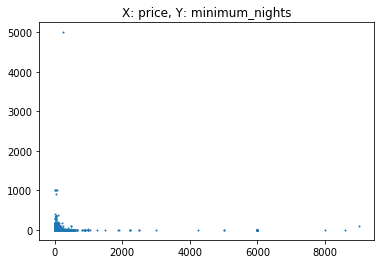

In [16]:
plot_pair(df_list, ['price'], ['minimum_nights'])

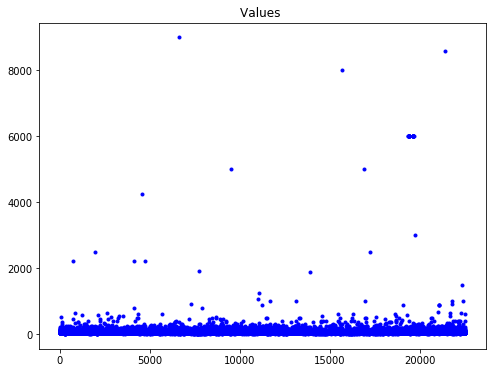

In [17]:
plot_Y(df_list['price'])

('NaN count:', 0, 'Unique count:', 295)
('Max:', 9000, 'Min:', 0)
('Median', 45.0, 'Mean:', 67.14366796736431, 'Std:', 220.2613265910614)


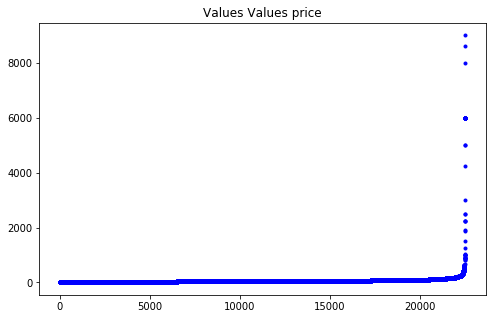

/home/maxime/anaconda3/envs/tf-gpu/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning:


The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.



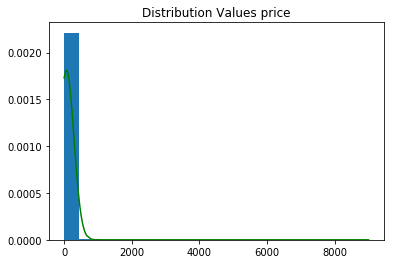

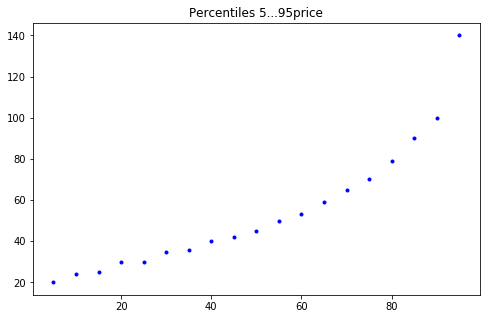

In [18]:
plot_col_distribution(df_list, ['price'])

Now work on listings_summary.csv

In [19]:
# First, we only keep certain columns:

columns_to_keep = ['id', 'space', 'description', 'host_has_profile_pic', 'neighbourhood_group_cleansed', 
                   'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',  
                   'bedrooms', 'bed_type', 'amenities', 'square_feet', 'price', 'cleaning_fee', 
                   'security_deposit', 'extra_people', 'guests_included', 'minimum_nights',  
                   'instant_bookable', 'is_business_travel_ready', 'cancellation_policy']

In [20]:
df_list_sum_tronc = pd_col_keep(df_list_sum, columns_to_keep, ['id'])

In [21]:
df_list_sum_tronc.shape

(453, 23)

In [22]:
df_list_sum_tronc[['price', 'cleaning_fee', 'extra_people', 'security_deposit']].head(3)

,price,cleaning_fee,extra_people,security_deposit
id,,,,
2015,$60.00,$30.00,$28.00,$200.00
2695,$17.00,$0.00,$0.00,$0.00
3176,$90.00,$50.00,$20.00,$200.00


In [23]:
column_list = ['price', 'cleaning_fee', 'extra_people', 'security_deposit']
df_list_sum_tronc = pd_col_remove_text(df_list_sum_tronc, column_list, '$')

In [24]:
def pd_col_fill_nan(df, col_list, value):
    '''
    Function to fill NaNs with a specific value in certain columns
    Arguments:
        df:            dataframe
        col_list:      list of columns to remove text
        value:         value to replace NaNs with
    Returns:
        df:            new dataframe with filled values
    '''
    
    for col in col_list:
        nb_nans = df[col].isna().sum()
        if nb_nans == 0:
            pass
        else:
            print(f'there were {nb_nans} empty values in {col}')
            df = df
            df[col].fillna(value)
            nb_nans = df[col].isna().sum()
    
        print(f'there are {nb_nans} empty values in {col}')
    return df

In [25]:
df_list_sum_tronc = pd_col_fill_nan(df_list_sum_tronc, column_list, 0.0)

there are 0 empty values in price
there were 48 empty values in cleaning_fee
there are 48 empty values in cleaning_fee
there are 0 empty values in extra_people
there were 114 empty values in security_deposit
there are 114 empty values in security_deposit


As was seen in the plotting of the price, there are huge outliers in the price (some apartments are very expensive, but there are very few of those)

In [26]:
df_list_sum_tronc = pd_row_drop_above_thresh(df_list_sum_tronc, 'price', thresh=500)

('NaN count:', 0, 'Unique count:', 104)
('Max:', 506.0, 'Min:', 9.0)
('Median', 60.0, 'Mean:', 68.65342163355409, 'Std:', 45.23342908064752)


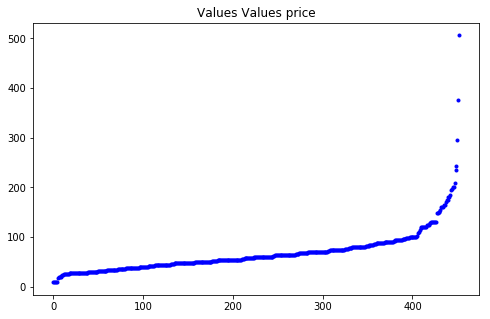

/home/maxime/anaconda3/envs/tf-gpu/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning:


The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.



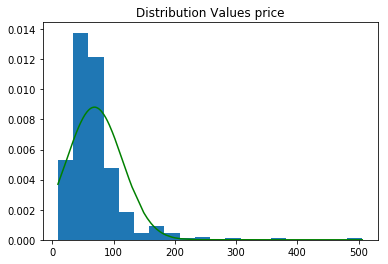

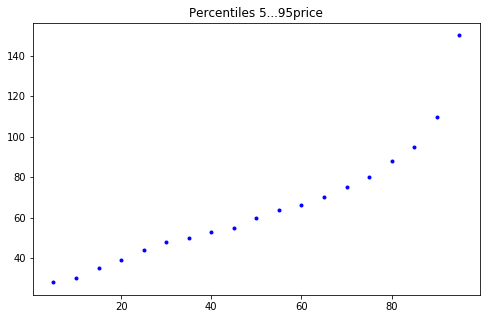

In [27]:
plot_col_distribution(df_list_sum_tronc, ['price'])

In [28]:
plot_cols_with_NaNs(df_list_sum_tronc, 10)

Out of 453 columns, the columns with most missing values are :
square_feet                     286
security_deposit                114
cleaning_fee                     48
bathrooms                        12
space                             6
description                       1
bedrooms                          1
accommodates                      0
host_has_profile_pic              0
neighbourhood_group_cleansed      0
dtype: int64


Following this, we can remove the columns with too many missing values

In [29]:
df_list_sum_tronc = pd_col_remove(df_list_sum_tronc, ['square_feet'])

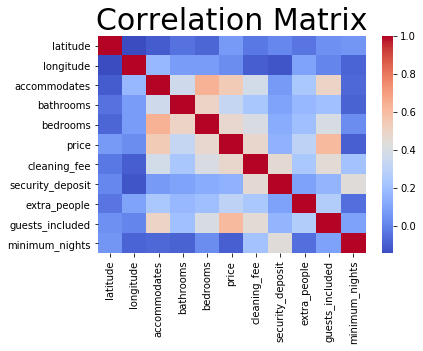

In [30]:
plot_col_correl_matrix(df_list_sum_tronc, df_list_sum_tronc.columns, annot=False)

In [31]:
plot_col_correl_target(df_list_sum_tronc, df_list_sum_tronc.columns, ['price'], nb_to_show=5, ascending=False)

Most correlated features to ['price'] are: 
                    price
price            1.000000
guests_included  0.607970
accommodates     0.543297
cleaning_fee     0.480775
bedrooms         0.475310


In [32]:
plot_col_correl_target(df_list_sum_tronc, df_list_sum_tronc.columns, ['price'], nb_to_show=5, ascending=True)

Least correlated features to ['price'] are: 
                     price
minimum_nights   -0.094441
longitude         0.030188
latitude          0.074112
security_deposit  0.153548
extra_people      0.302841


__Feature Engineering__

In [33]:
# Calculating the distance from the appartement to the center of Berlin

berlin_center = (52.5027778, 13.404166666666667)
df_list_sum_tronc = pd_col_add_distance_to_point(df_list_sum_tronc, berlin_center)

In [34]:
df_list_sum_tronc.head(1)

,space,description,host_has_profile_pic,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,...,price,cleaning_fee,security_deposit,extra_people,guests_included,minimum_nights,instant_bookable,is_business_travel_ready,cancellation_policy,distance
id,,,,,,,,,,,,,,,,,,,,,
2015,A+++ location! This „Einliegerwohnung“ is an e...,Great location! 30 of 75 sq meters. This wood...,t,Mitte,52.534537,13.402557,Guesthouse,Entire home/apt,3,1.0,...,60.0,30.0,200.0,28.0,1,4,f,f,strict_14_with_grace_period,3.533


In [35]:
plot_col_frequency_text_appears(df_list_sum_tronc, ['amenities'], nb_to_show=30)

('Heating', 448)
('Wifi', 434)
('Kitchen', 417)
('Essentials', 362)
('Washer', 358)
('Internet', 349)
('Hair dryer', 340)
('Hangers', 310)
('TV', 305)
('Hot water', 291)
('Buzzer/wireless intercom', 283)
('Laptop friendly workspace', 279)
('Family/kid friendly', 274)
('Iron', 272)
('Shampoo', 198)
('Host greets you', 195)
('Cable TV', 170)
('Smoke detector', 169)
('Bed linens', 152)
('Free street parking', 147)
('Refrigerator', 142)
('Dishes and silverware', 139)
('Long term stays allowed', 139)
('Cooking basics', 132)
('Stove', 129)
('Dryer', 124)
('Coffee maker', 114)
('translation missing: en.hosting_amenity_50', 113)
('Luggage dropoff allowed', 111)
('Elevator', 104)


In [36]:
# Add One hot encoding for some features in the appartment from what is inside 'amenities'

df_list_sum_tronc = pd_col_add_col_from_comment(df_list_sum_tronc, 'Wifi', 'amenities')
df_list_sum_tronc = pd_col_add_col_from_comment(df_list_sum_tronc, 'Laptop friendly workspace', 'amenities')
df_list_sum_tronc = pd_col_add_col_from_comment(df_list_sum_tronc, 'TV', 'amenities')
df_list_sum_tronc = pd_col_add_col_from_comment(df_list_sum_tronc, 'Free street parking', 'amenities')
df_list_sum_tronc = pd_col_add_col_from_comment(df_list_sum_tronc, 'Elevator', 'amenities')
df_list_sum_tronc = pd_col_add_col_from_comment(df_list_sum_tronc, 'Family/kid friendly', 'amenities')

Wifi 2 (453, 24)
Laptop friendly workspace 2 (453, 25)
TV 2 (453, 26)
Free street parking 2 (453, 27)
Elevator 2 (453, 28)
Family/kid friendly 2 (453, 29)


In [37]:
# After that, just drop 'amenities' col:
df_list_sum_tronc = pd_col_remove(df_list_sum_tronc, ['amenities'])